# Keara Toop's SLP Deliverable #2 Code

In [ ]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

In [ ]:
#read in files
mxmh = pd.read_csv("mxmh_survey_results.csv") #mxmh stands for "Music and Mental Health"
spotify_qt = pd.read_csv("Spotify Quarterly.csv") #spotify_qt stands for "Spotify quarterly"

##**The main dataset for this project will be "Music and Mental Health," so we will start there.**

###General cleaning to remove the data I don't need. This is also helping to create better-looking visuals

In [ ]:
#removing columns I don't use
mxmh_remove = ["Timestamp", "Instrumentalist", "Composer", "Exploratory", "Foreign languages", "BPM", "Permissions"]
mxmh = mxmh.drop(columns= mxmh_remove)

#remove NaN entries
mxmh = mxmh.dropna()

#Editing the responses for the Primary streaming service column to be more simple (looks better on the graph)
mxmh.replace(["Other streaming service", "I do not use a streaming service."], ["Other", "None"], inplace=True)

###To begin, look at the first few rows, and all of the columns

In [ ]:
#first few rows of mxmh
mxmh.head()

In [ ]:
#all columns in mxmh
mxmh.info()

### Let's examine the different streaming services included.

In [ ]:
#getting all of the values from the "Primary streaming service" column
services = mxmh["Primary streaming service"].value_counts()
print(services)

#looking at the results, Spotify is the most used streaming service among the participants

Spotify          453
YouTube Music     93
None              69
Apple Music       50
Other             49
Pandora           10
Name: Primary streaming service, dtype: int64


#### A graph showing the distribution of the different streaming services listed (2 ways, bar and pie).

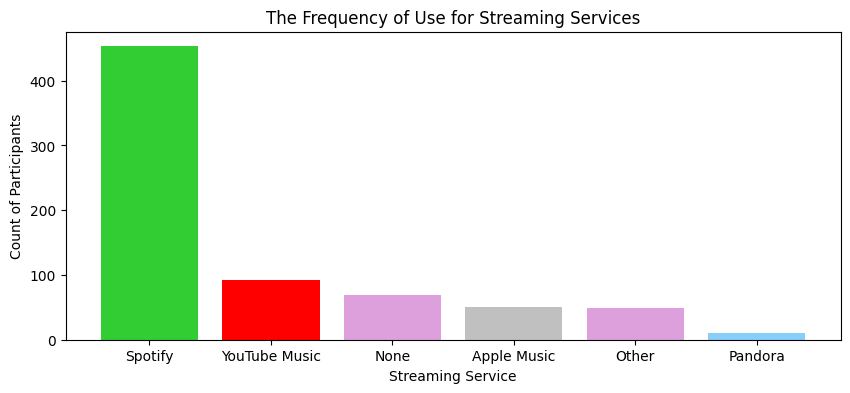

In [ ]:
#bar graph
#specify colors: these are my standard colors when I am using the streaming services column because they match the main color from that service
bar_colors = ['limegreen', 'red', 'plum', 'silver', 'plum', 'lightskyblue']
#color guide: https://matplotlib.org/stable/gallery/color/named_colors.html

#create the graph using "services" from above
fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(services.index, services.values, color=bar_colors)

#add labels
ax.set(xlabel='Streaming Service', ylabel="Count of Participants", title="The Frequency of Use for Streaming Services")

plt.show()

#Analysis: Spotify is the most used streaming service among participants

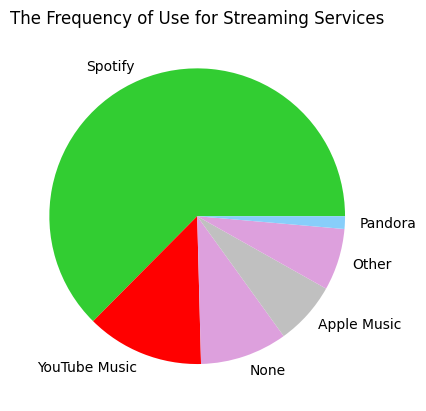

In [ ]:
#pie chart
#specify colors based on my standard
pie_colors = ['limegreen', 'red', 'plum', 'silver', 'plum', 'lightskyblue']

#create the graph using "services" from above
services.plot(kind="pie", colors=pie_colors)

#add title
plt.title("The Frequency of Use for Streaming Services")
plt.ylabel("") #this is so the writing on the side dissappears, it looked bad

plt.show()

#Analysis: Spotify is the most used streaming service among participants

### Looking at the ages of the participants.



In [ ]:
#creating a series with the age distribution
all_ages = mxmh["Age"].value_counts()
print(all_ages)

#The lowest age is 18
#The highest age is 89

18.0    83
19.0    60
17.0    59
21.0    48
16.0    44
        ..
73.0     1
72.0     1
69.0     1
10.0     1
89.0     1
Name: Age, Length: 61, dtype: int64


#### A graph showing the age distribution

Text(0, 0.5, 'Count')

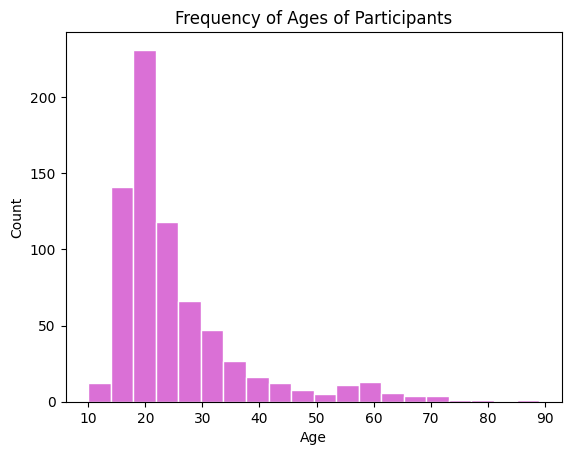

In [ ]:
#I used a histogram because they are the most commonly used for representing age distribution

#create the graph
mxmh.hist(["Age"], bins=20, grid=False, color="orchid", edgecolor="white")

#adding titles
plt.title("Frequency of Ages of Participants")
plt.xlabel("Age")
plt.ylabel("Count")

#Analysis: the majority of ages are in the 15-25 year old range.
  #There is not as much representation for generation x and the baby boomers as there is for millennials and gen z.

### Combining streaming service and age into one graph. This will help spotify know the age group for their target audience.

<ipython-input-6-80eb027cee62>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mxmh, x="Primary streaming service", y="Age", showfliers=False, palette=box_colors)


Text(0.5, 1.0, 'Streaming Service by Age')

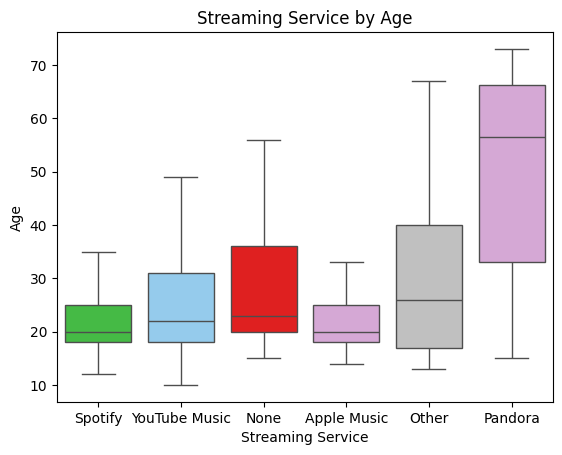

In [ ]:
#I wanted to use a boxplot for this, and I found that seaborn's boxplot was better: https://www.geeksforgeeks.org/boxplot-using-seaborn-in-python/
#create the graph
box_colors = ['limegreen', 'lightskyblue','red', 'plum', 'silver', 'plum', ]
sns.boxplot(data=mxmh, x="Primary streaming service", y="Age", showfliers=False, palette=box_colors)
#I removed the outliers for a cleaner look

#adding labels and title
plt.xlabel('Streaming Service')
plt.ylabel('Age')
plt.title('Streaming Service by Age')

#Analysis: the age group for Spotify is not very large, it mainly falls in the 18-26 years group. Apple Music has a similar distribution
  #Pandora has the largest age distribution

### Look at the hours of listening time per day

In [ ]:
#creating a series with the count of time listening to music per day
hours_daily = mxmh["Hours per day"].value_counts()
print(hours_daily)

#The maximum frequency range is from 1 to 3 hours of listening time per day

2.00     171
3.00     117
1.00     115
4.00      83
5.00      53
6.00      47
8.00      29
0.50      20
10.00     20
7.00      15
1.50      15
12.00      9
2.50       6
0.00       5
24.00      3
0.25       3
9.00       3
15.00      2
11.00      1
0.10       1
14.00      1
4.50       1
16.00      1
20.00      1
0.70       1
18.00      1
Name: Hours per day, dtype: int64


#### Graph showing the distribution of hours per day of listening time

Text(0, 0.5, 'Count of Participants')

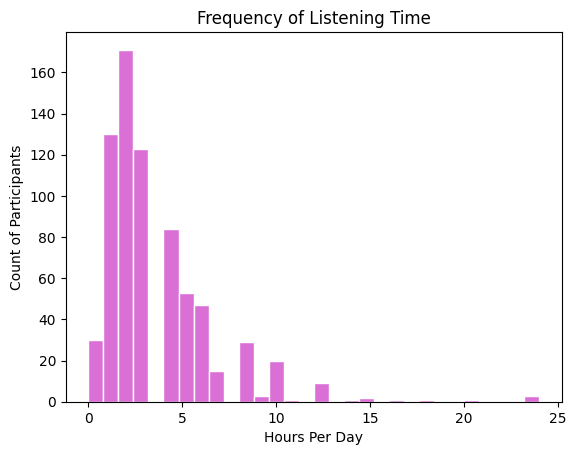

In [ ]:
#using a histogram, create the graph
mxmh.hist(["Hours per day"], bins=30, grid=False, color="orchid", edgecolor="white")

#adding titles
plt.title("Frequency of Listening Time")
plt.xlabel("Hours Per Day")
plt.ylabel("Count of Participants")

#Analysis: the highest range of hours per day is from 1 to 3 hours

### What is the ratio of who listens to music while working vs who doesn't?

In [ ]:
#series of the counts of who does/doesn't listent to music while at work
music_at_work = mxmh["While working"].value_counts()
print(music_at_work)

#The ratio is 579:154 yes to no

Yes    571
No     153
Name: While working, dtype: int64


#### Pie chart of who, among the participants, listens to music while at work.

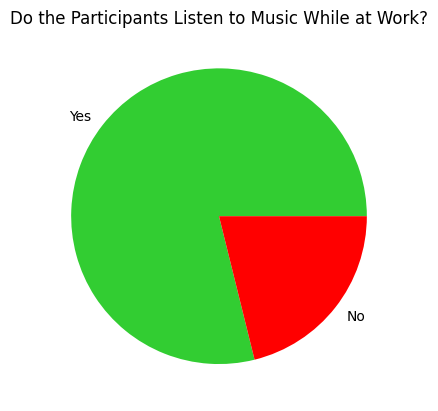

In [ ]:
#pie chart
#use music_at_work that I created above
#specify colors
yes_no = ['limegreen', 'red']

#create the graph using "music_at_work" from above
music_at_work.plot(kind="pie", colors=yes_no)

#add title
plt.title("Do the Participants Listen to Music While at Work?")
plt.ylabel("") #this is so the writing on the side dissappears, it looked bad

plt.show()

#Analysis: the majority responded "Yes"

### Graph of the frequency of different genres

<ipython-input-11-605d3dad2a8b>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[i // 4, i % 4], x=frequency_data[column], palette=frequency_colors, order=frequency_order)
<ipython-input-11-605d3dad2a8b>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[i // 4, i % 4], x=frequency_data[column], palette=frequency_colors, order=frequency_order)
<ipython-input-11-605d3dad2a8b>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[i // 4, i % 4], x=frequency_data[column], palette=frequency_colors, order=frequency_order

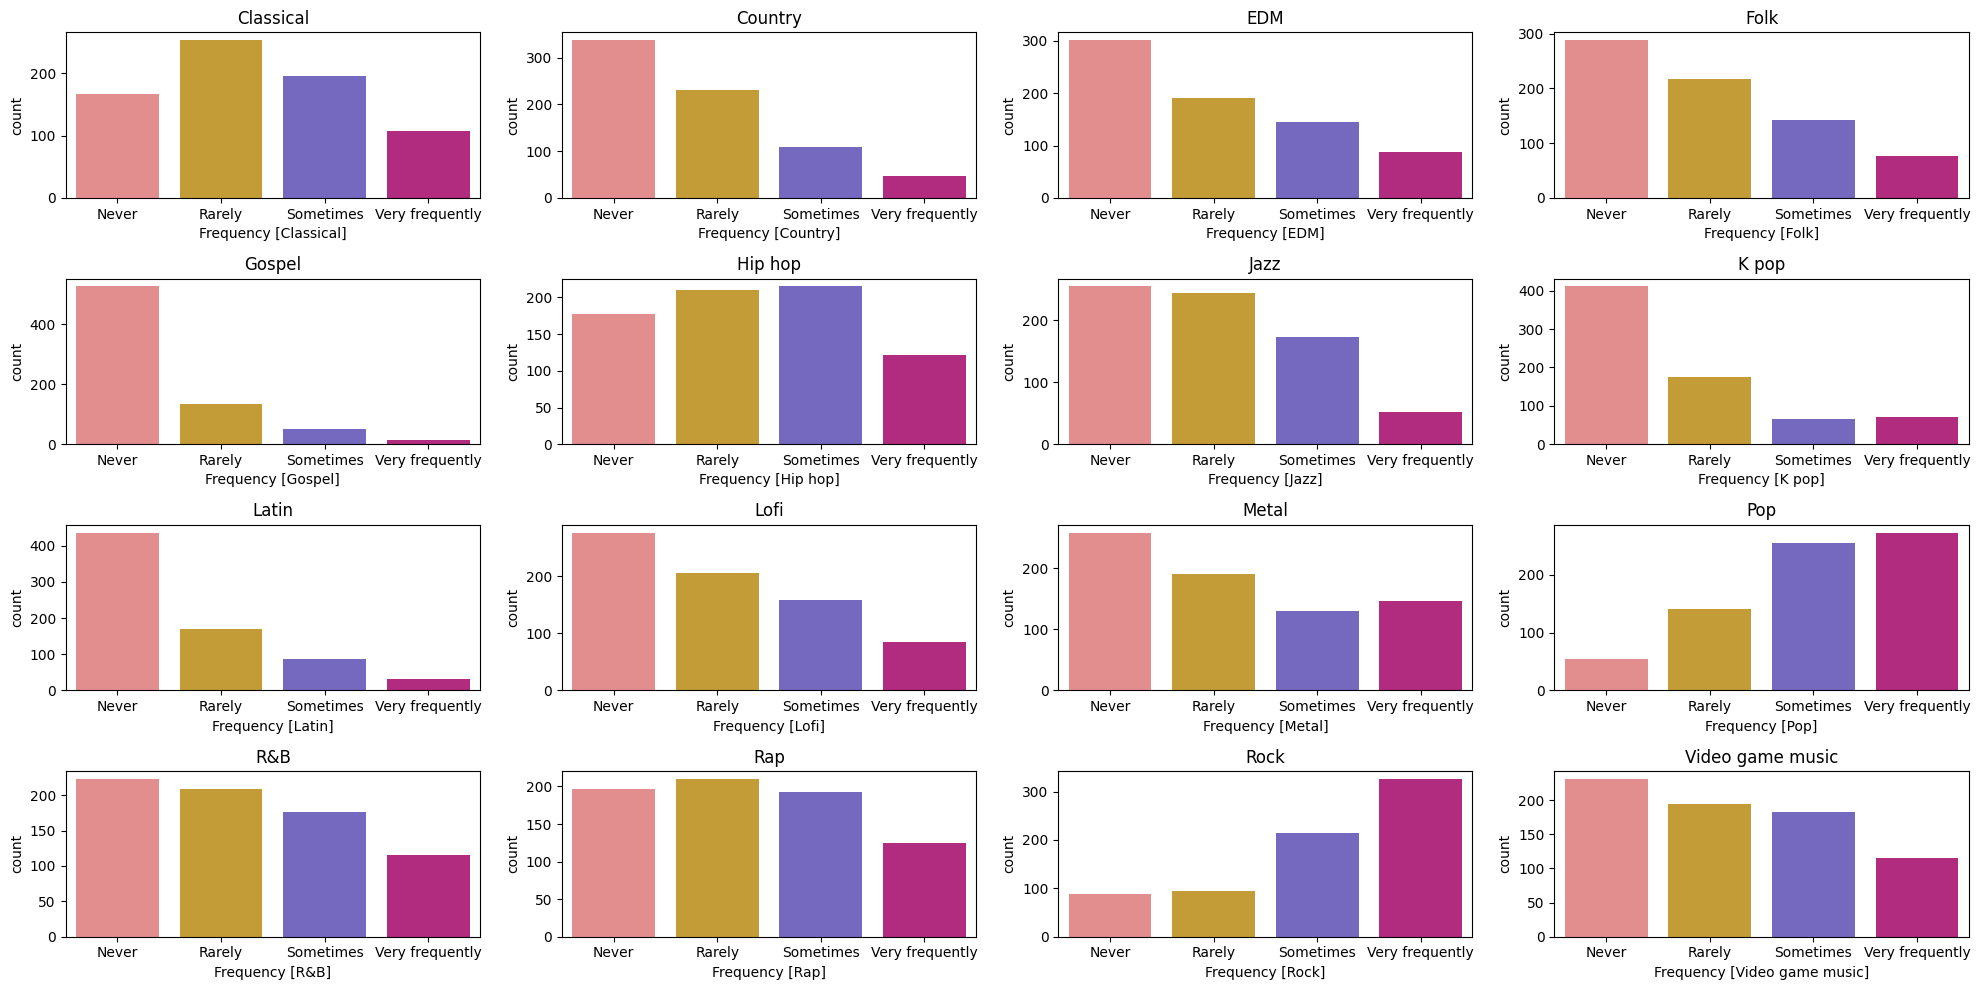

In [ ]:
#doing bar graphs for each and combining into one
  #https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/
  #https://stackoverflow.com/questions/38082602/plotting-multiple-different-plots-in-one-figure-using-seaborn

#picking colors
frequency_colors = ["lightcoral", "goldenrod", "slateblue", "mediumvioletred"]

#specifying the order of the bars
frequency_order = ["Never", "Rarely", "Sometimes", "Very frequently"]

#for titles
titles = ['Classical','Country','EDM','Folk','Gospel','Hip hop','Jazz','K pop','Latin','Lofi','Metal','Pop','R&B','Rap','Rock','Video game music']

#making the initial figure size with the subplots
figure, axes = plt.subplots(4, 4, figsize=(20,10))

#sub dataframe with only the info we need
frequency_data = mxmh[['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]',
                       'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
                       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']]

#making all of the graphs
for i, column in enumerate(frequency_data):
    sns.countplot(ax=axes[i // 4, i % 4], x=frequency_data[column], palette=frequency_colors, order=frequency_order)
    axes[i // 4, i % 4].set_title(titles[i])

#printing
plt.tight_layout()

### Breakdown of the most common favorite genres included in the survey

In [ ]:
#series of the counts of favorite genres
fav_genres = mxmh["Fav genre"].value_counts()
print(fav_genres)

#Rock and pop have the highest frequency of the favorite genres

Rock                185
Pop                 114
Metal                88
Classical            53
Video game music     44
EDM                  36
R&B                  35
Hip hop              34
Folk                 29
Country              24
K pop                22
Rap                  22
Jazz                 20
Lofi                 10
Gospel                6
Latin                 2
Name: Fav genre, dtype: int64


#### Graph of the favorite genres

<ipython-input-13-f91376ce1a94>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


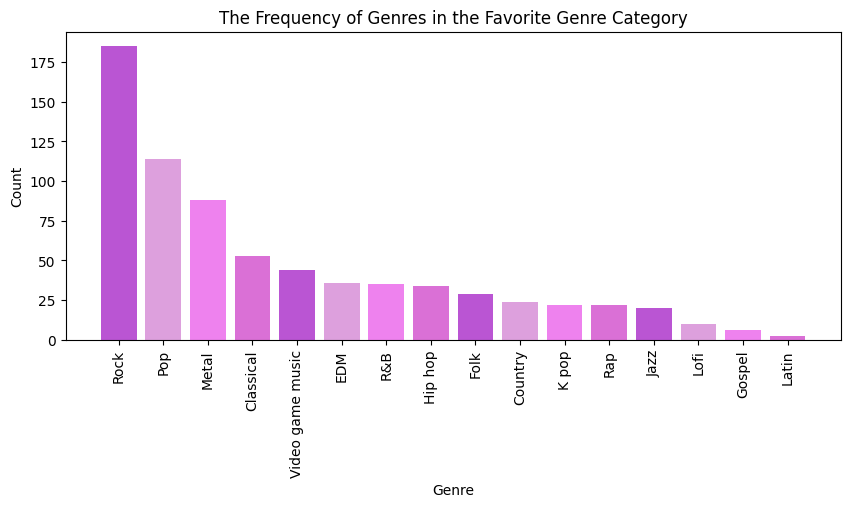

In [ ]:
#bar graph
#specify colors: create my standard for genre colors
genres_colors = ["mediumorchid", "plum", "violet", "orchid"]

#create the graph using "fav_genres" from above
fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(fav_genres.index, fav_genres.values, color=genres_colors)

#add labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
  #rotate so "Video game music" fits: https://medium.com/dunder-data/automatically-wrap-graph-labels-in-matplotlib-and-seaborn-a48740bc9ce
ax.set(xlabel="Genre", ylabel="Count", title="The Frequency of Genres in the Favorite Genre Category")

plt.show()

#Analysis: the genre with the greatest frequency is "Rock," and the least frequent is "Latin"

### Graph of the favorite genres by age

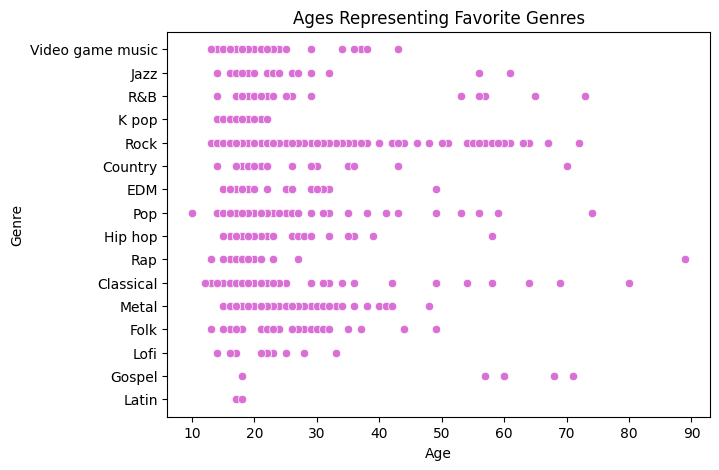

In [ ]:
#using a scatterplot: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

#create graph
plt.subplots(figsize=(7, 5))
sns.scatterplot(data = mxmh, y="Fav genre", x="Age", color="orchid")

#title & labels
plt.title("Ages Representing Favorite Genres")
plt.ylabel("Genre")
plt.xlabel("Age")

plt.show()

#I thought this was an interesting way to view the data differently

### The distribution of participants' opinions of if music helps their mental health

In [ ]:
#create a series with the counts for each response to the question if music effects their mental health

music_effects = mxmh["Music effects"].value_counts()
print(music_effects)

#in general, the majority say that music improves their mental health

Improve      539
No effect    168
Worsen        17
Name: Music effects, dtype: int64


#### Does listening to music effect their mental health?

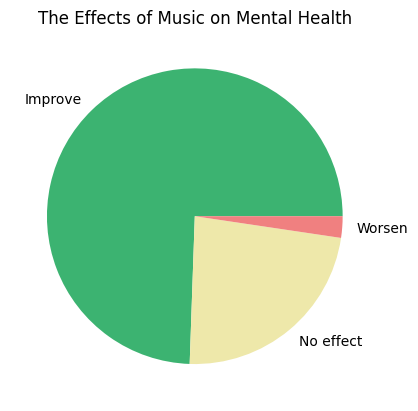

In [ ]:
#pie chart because there are only 3 options
#use music_effects that I created above
#specify colors: standard colors for effects
effects = ['mediumseagreen', 'palegoldenrod', 'lightcoral']

#create the graph using "services" from above
music_effects.plot(kind="pie", colors=effects)

#add title
plt.title("The Effects of Music on Mental Health")
plt.ylabel("") #this is so the writing on the side dissappears, it looked bad

plt.show()

#Analysis: the majority claimed music improved their mental health

### Let's look at the different mental illnesses included. Each participant ranked each mental illness based on how regularly/how extreme they experience this illness.

In [ ]:
#a sub-dataframe with only the mental illness columns
mental_illness = mxmh[["Anxiety", "Depression", "Insomnia", "OCD"]]
print(mental_illness)

#useful for the next prompt

     Anxiety  Depression  Insomnia  OCD
2        7.0         7.0      10.0  2.0
3        9.0         7.0       3.0  3.0
4        7.0         2.0       5.0  9.0
5        8.0         8.0       7.0  7.0
6        4.0         8.0       6.0  0.0
..       ...         ...       ...  ...
731      7.0         6.0       0.0  9.0
732      3.0         2.0       2.0  5.0
733      2.0         2.0       2.0  2.0
734      2.0         3.0       2.0  1.0
735      2.0         2.0       2.0  5.0

[724 rows x 4 columns]


#### Finding the average score for each of the mental illnesses (out of 10).

In [ ]:
#this is the average score for each mental illness over the 736 participants
average_mental_score = pd.DataFrame(mental_illness.mean(), columns=['Average'])

print(average_mental_score)
#looking at the results, anxiety has the highest overall average, and OCD has the lowest overall average

             Average
Anxiety     5.830801
Depression  4.801105
Insomnia    3.731354
OCD         2.631215


#### Ranking distrubution for each mental health illness

In [ ]:
#important note: all of the rankings are whole numbers (no decimals) in the actual data
#first make a dictionary
ranking_dist = {
    "Anxiety": [(mxmh['Anxiety'] == 0).sum(), (mxmh['Anxiety'] == 1).sum(), (mxmh['Anxiety'] == 2).sum(), (mxmh['Anxiety'] == 3).sum(), (mxmh['Anxiety'] == 4).sum(),(mxmh['Anxiety'] == 5).sum(),(mxmh['Anxiety'] == 6).sum(),(mxmh['Anxiety'] == 7).sum(),(mxmh['Anxiety'] == 8).sum(),(mxmh['Anxiety'] == 9).sum(),(mxmh['Anxiety'] == 10).sum()],
    "Depression": [(mxmh['Depression'] == 0).sum(), (mxmh['Depression'] == 1).sum(), (mxmh['Depression'] == 2).sum(), (mxmh['Depression'] == 3).sum(), (mxmh['Depression'] == 4).sum(),(mxmh['Depression'] == 5).sum(),(mxmh['Depression'] == 6).sum(),(mxmh['Depression'] == 7).sum(),(mxmh['Depression'] == 8).sum(),(mxmh['Depression'] == 9).sum(),(mxmh['Depression'] == 10).sum()],
    "Insomnia": [(mxmh['Insomnia'] == 0).sum(), (mxmh['Insomnia'] == 1).sum(), (mxmh['Insomnia'] == 2).sum(), (mxmh['Insomnia'] == 3).sum(), (mxmh['Insomnia'] == 4).sum(),(mxmh['Insomnia'] == 5).sum(),(mxmh['Insomnia'] == 6).sum(),(mxmh['Insomnia'] == 7).sum(),(mxmh['Insomnia'] == 8).sum(),(mxmh['Insomnia'] == 9).sum(),(mxmh['Insomnia'] == 10).sum()],
    "OCD": [(mxmh['OCD'] == 0).sum(), (mxmh['OCD'] == 1).sum(), (mxmh['OCD'] == 2).sum(), (mxmh['OCD'] == 3).sum(), (mxmh['OCD'] == 4).sum(),(mxmh['OCD'] == 5).sum(),(mxmh['OCD'] == 6).sum(),(mxmh['OCD'] == 7).sum(),(mxmh['OCD'] == 8).sum(),(mxmh['OCD'] == 9).sum(),(mxmh['OCD'] == 10).sum()]
}

#turn the dictionary into a dataframe
ranking_dist_df = pd.DataFrame(ranking_dist)

print(ranking_dist_df)

#this is helpful for the visual

    Anxiety  Depression  Insomnia  OCD
0        34          82       148  243
1        29          40        80   94
2        44          90        84   95
3        66          57        68   64
4        55          58        59   48
5        59          55        57   53
6        83          88        61   33
7       121          96        59   30
8       114          76        49   28
9        53          37        26   14
10       65          43        32   20


#### Distribution of Rankings for mental health illnesses by the number of rankings

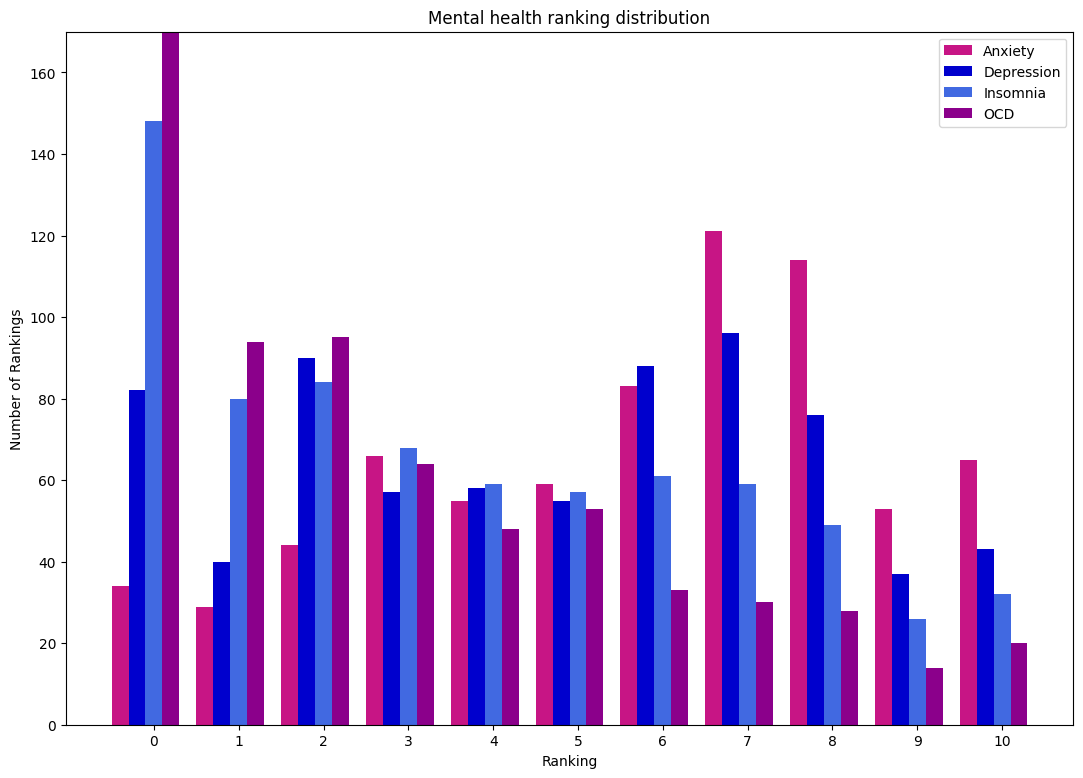

In [ ]:
#multiple bar plots in one
#using ranking_dist_df that I made above
#I got confused with the bar width stuff, but I used this source that helped (https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py)
  #I just did the math for 4 cols instead of 2

#create the labels and the width
labels = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
x = np.arange(len(labels)) #the label locations
width = 0.2 #the width of the bars

#create the graph
fig, ax = plt.subplots(figsize=(13, 9))

#making each of the bars
b1 = ax.bar(x-2*width, ranking_dist_df["Anxiety"], width, label="Anxiety", color = 'mediumvioletred')
b2 = ax.bar(x-width, ranking_dist_df["Depression"], width, label="Depression", color = 'mediumblue')
b3 = ax.bar(x, ranking_dist_df["Insomnia"], width, label="Insomnia", color = 'royalblue')
b4 = ax.bar(x+width, ranking_dist_df["OCD"], width, label="OCD", color = 'darkmagenta')

#setting the limits and labels
ax.set_ylim([0, 170])
ax.set_ylabel('Number of Rankings')
ax.set_xlabel('Ranking')
ax.set_title('Mental health ranking distribution')
ax.set_xticks(x, labels)
ax.legend()

plt.show()

### For each mental health illness (Anxiety, Depression, Insomnia, OCD), examine the relationship between favorite genres and the rankings for the mental health illness.

<ipython-input-21-1794d5ed3556>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data= mxmh, x='Fav genre', y='Anxiety', palette=genres_colors, ci=None)
<ipython-input-21-1794d5ed3556>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= mxmh, x='Fav genre', y='Anxiety', palette=genres_colors, ci=None)
<ipython-input-21-1794d5ed3556>:9: UserWarning: 
The palette list has fewer values (4) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data= mxmh, x='Fav genre', y='Anxiety', palette=genres_colors, ci=None)


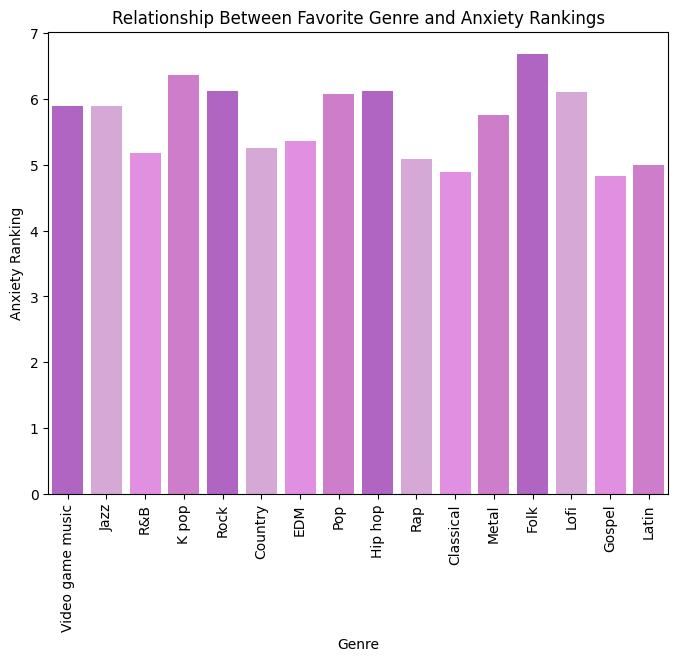

In [ ]:
#anxiety
#set the colors based on the other genre graph
genres_colors = ["mediumorchid", "plum", "violet", "orchid"]

#source for sns to remove error bars (https://datascience.stackexchange.com/questions/43822/what-is-the-concept-of-error-bars-in-barplots-in-seaborn-library)

#plot
plt.figure(figsize=(8,6))
sns.barplot(data= mxmh, x='Fav genre', y='Anxiety', palette=genres_colors, ci=None)
plt.xticks(rotation=90)

#add titles
plt.title("Relationship Between Favorite Genre and Anxiety Rankings")
plt.xlabel("Genre")
plt.ylabel("Anxiety Ranking")

plt.show()

<ipython-input-22-734e57136613>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data= mxmh, x='Fav genre', y='Depression', palette=genres_colors, ci=None)
<ipython-input-22-734e57136613>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= mxmh, x='Fav genre', y='Depression', palette=genres_colors, ci=None)
<ipython-input-22-734e57136613>:9: UserWarning: 
The palette list has fewer values (4) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data= mxmh, x='Fav genre', y='Depression', palette=genres_colors, ci=None)


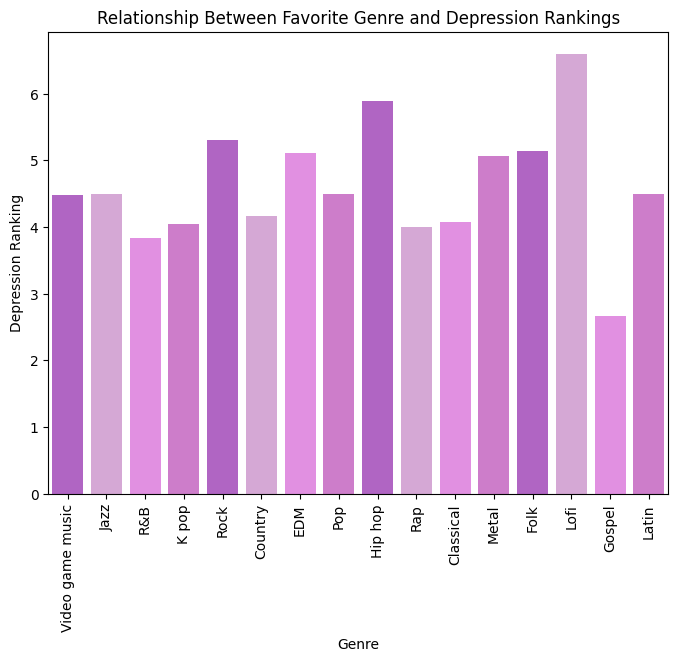

In [ ]:
#depression
#set the colors based on the other genre graph
genres_colors = ["mediumorchid", "plum", "violet", "orchid"]

#source for sns to remove error bars (https://datascience.stackexchange.com/questions/43822/what-is-the-concept-of-error-bars-in-barplots-in-seaborn-library)

#plot
plt.figure(figsize=(8,6))
sns.barplot(data= mxmh, x='Fav genre', y='Depression', palette=genres_colors, ci=None)
plt.xticks(rotation=90)

#add titles
plt.title("Relationship Between Favorite Genre and Depression Rankings")
plt.xlabel("Genre")
plt.ylabel("Depression Ranking")

plt.show()

<ipython-input-23-1de31f8e50f0>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data= mxmh, x='Fav genre', y='Insomnia', palette=genres_colors, ci=None)
<ipython-input-23-1de31f8e50f0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= mxmh, x='Fav genre', y='Insomnia', palette=genres_colors, ci=None)
<ipython-input-23-1de31f8e50f0>:9: UserWarning: 
The palette list has fewer values (4) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data= mxmh, x='Fav genre', y='Insomnia', palette=genres_colors, ci=None)


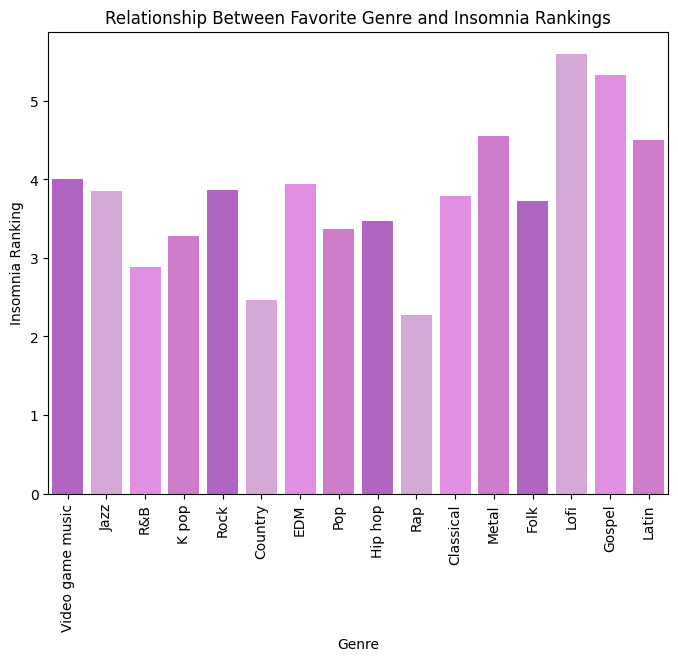

In [ ]:
#insomnia
#set the colors based on the other genre graph
genres_colors = ["mediumorchid", "plum", "violet", "orchid"]

#source for sns to remove error bars (https://datascience.stackexchange.com/questions/43822/what-is-the-concept-of-error-bars-in-barplots-in-seaborn-library)

#plot
plt.figure(figsize=(8,6))
sns.barplot(data= mxmh, x='Fav genre', y='Insomnia', palette=genres_colors, ci=None)
plt.xticks(rotation=90)

#add titles
plt.title("Relationship Between Favorite Genre and Insomnia Rankings")
plt.xlabel("Genre")
plt.ylabel("Insomnia Ranking")

plt.show()

<ipython-input-24-6b568ee725cc>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data= mxmh, x='Fav genre', y='OCD', palette=genres_colors, ci=None)
<ipython-input-24-6b568ee725cc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= mxmh, x='Fav genre', y='OCD', palette=genres_colors, ci=None)
<ipython-input-24-6b568ee725cc>:9: UserWarning: 
The palette list has fewer values (4) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data= mxmh, x='Fav genre', y='OCD', palette=genres_colors, ci=None)


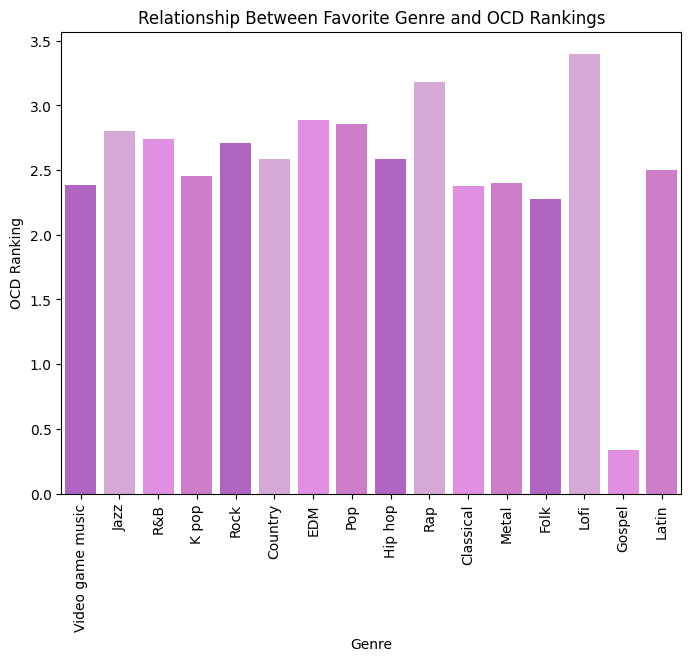

In [ ]:
#OCD
#set the colors based on the other genre graph
genres_colors = ["mediumorchid", "plum", "violet", "orchid"]

#source for sns to remove error bars (https://datascience.stackexchange.com/questions/43822/what-is-the-concept-of-error-bars-in-barplots-in-seaborn-library)

#plot
plt.figure(figsize=(8,6))
sns.barplot(data= mxmh, x='Fav genre', y='OCD', palette=genres_colors, ci=None)
plt.xticks(rotation=90)

#add titles
plt.title("Relationship Between Favorite Genre and OCD Rankings")
plt.xlabel("Genre")
plt.ylabel("OCD Ranking")

plt.show()

### Examine how the different genres effect the mental health illnesses (one graph for each of the 4).

Limitation: For each participant, they can only say if music in general affected their mental health. They did not answer specifically for each genre, so there are some genres without all of the effects columns.

<ipython-input-25-4d891e1735b6>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data= mxmh, x='Fav genre', y='Anxiety', hue='Music effects', palette=effects, ci=None)


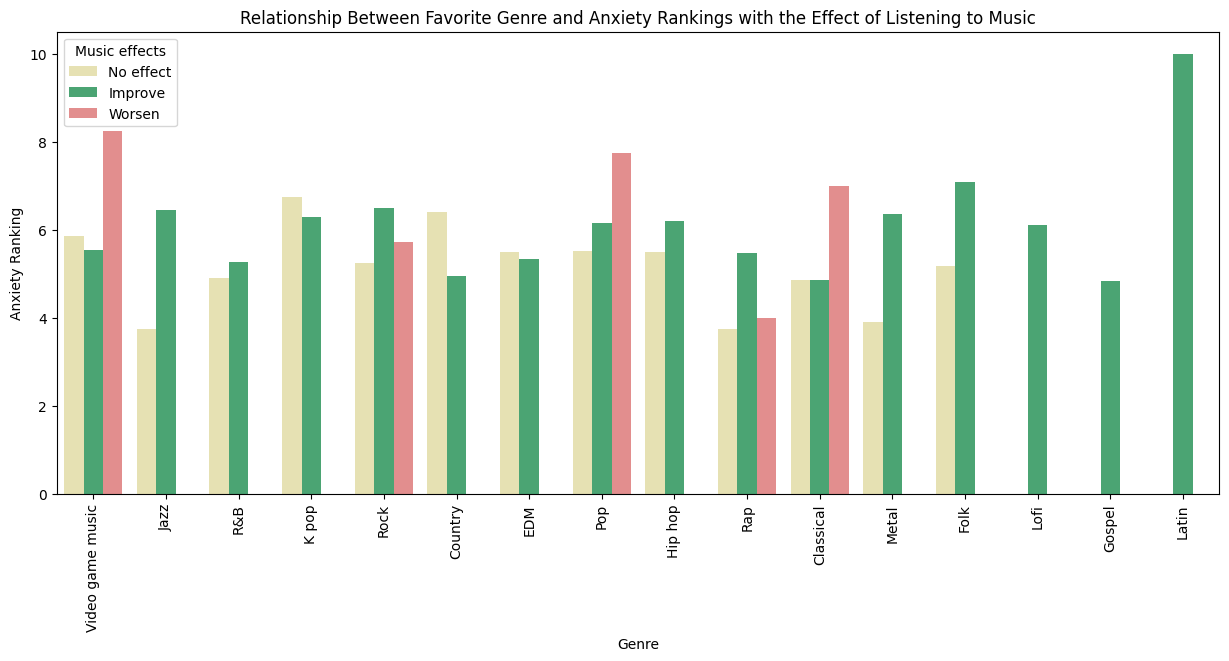

In [ ]:
#Anxiety
#source for help with 3 bars in seaborn (https://stackoverflow.com/questions/38807895/seaborn-multiple-barplots)
#set the colors based on the other effects graph
effects = ['palegoldenrod', 'mediumseagreen', 'lightcoral']

#plot
plt.figure(figsize=(15,6))
sns.barplot(data= mxmh, x='Fav genre', y='Anxiety', hue='Music effects', palette=effects, ci=None)
plt.xticks(rotation=90)

#add titles
plt.title("Relationship Between Favorite Genre and Anxiety Rankings with the Effect of Listening to Music")
plt.xlabel("Genre")
plt.ylabel("Anxiety Ranking")
ax.legend()

plt.show()

<ipython-input-26-109980bf3949>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data= mxmh, x='Fav genre', y='Depression', hue='Music effects', palette=effects, ci=None)


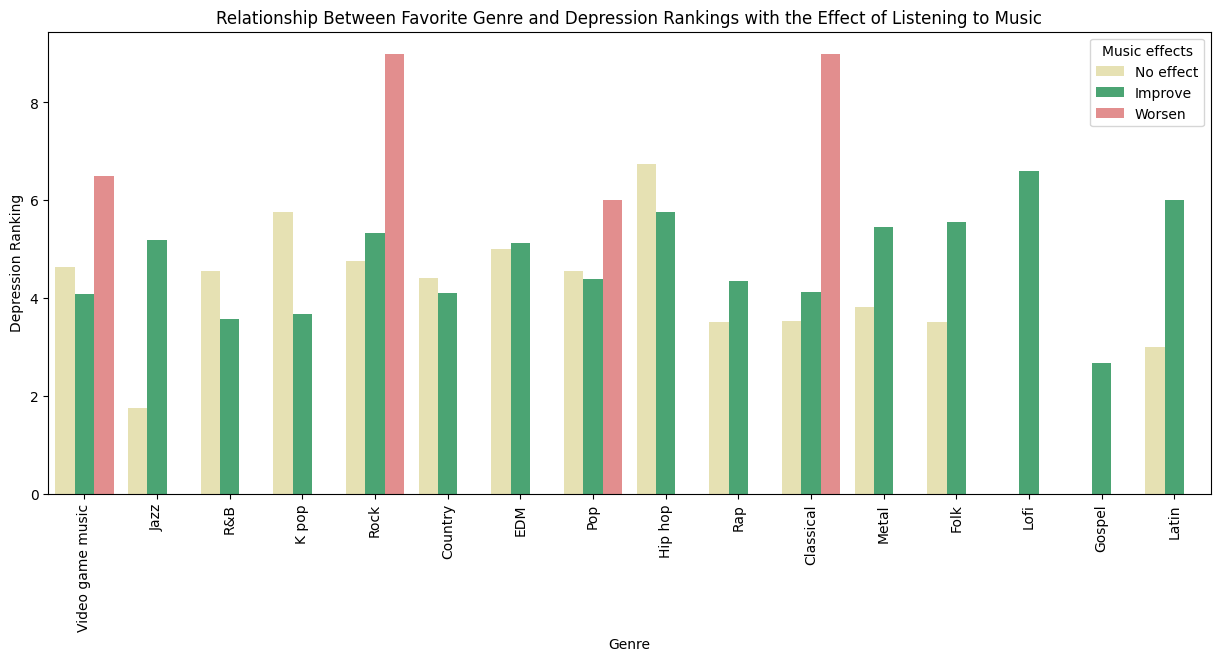

In [ ]:
#Depression
#source for help with 3 bars in seaborn (https://stackoverflow.com/questions/38807895/seaborn-multiple-barplots)
#set the colors based on the other effects graph
effects = ['palegoldenrod', 'mediumseagreen', 'lightcoral']

#plot
plt.figure(figsize=(15,6))
sns.barplot(data= mxmh, x='Fav genre', y='Depression', hue='Music effects', palette=effects, ci=None)
plt.xticks(rotation=90)

#add titles
plt.title("Relationship Between Favorite Genre and Depression Rankings with the Effect of Listening to Music")
plt.xlabel("Genre")
plt.ylabel("Depression Ranking")
ax.legend()

plt.show()

<ipython-input-27-9233f5b0036d>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data= mxmh, x='Fav genre', y='Insomnia', hue='Music effects', palette=effects, ci=None)


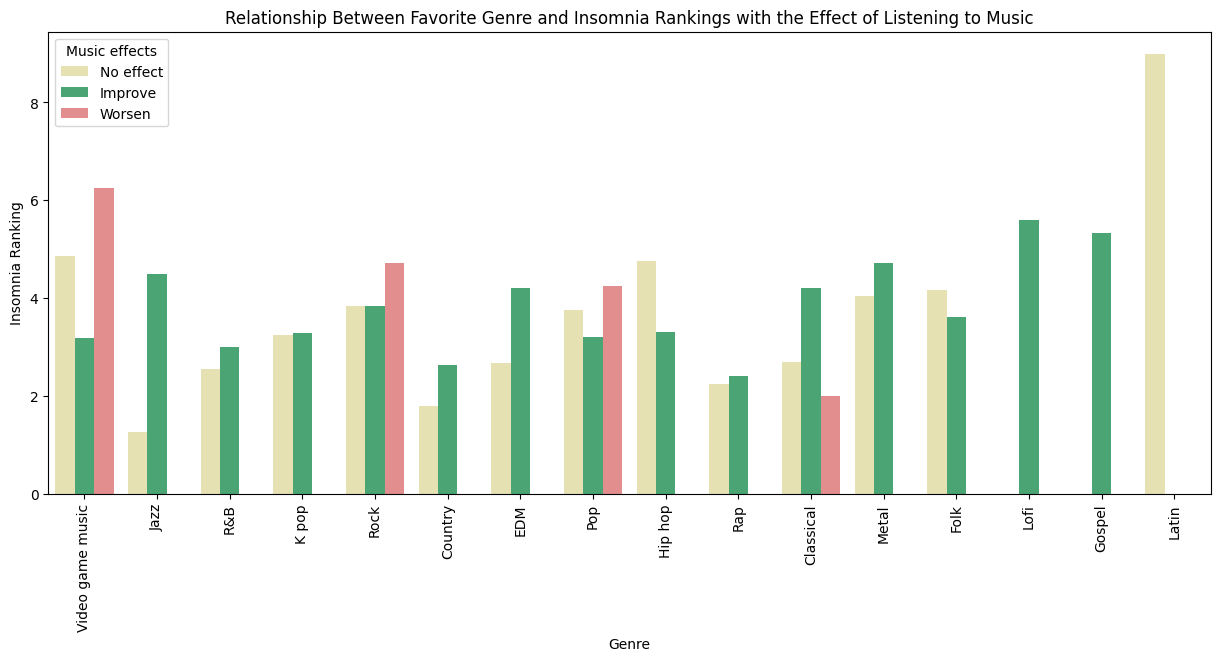

In [ ]:
#Insomnia
#source for help with 3 bars in seaborn (https://stackoverflow.com/questions/38807895/seaborn-multiple-barplots)
#set the colors based on the other effects graph
effects = ['palegoldenrod', 'mediumseagreen', 'lightcoral']

#plot
plt.figure(figsize=(15,6))
sns.barplot(data= mxmh, x='Fav genre', y='Insomnia', hue='Music effects', palette=effects, ci=None)
plt.xticks(rotation=90)

#add titles
plt.title("Relationship Between Favorite Genre and Insomnia Rankings with the Effect of Listening to Music")
plt.xlabel("Genre")
plt.ylabel("Insomnia Ranking")
ax.legend()

plt.show()

<ipython-input-28-da6993e197af>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data= mxmh, x='Fav genre', y='OCD', hue='Music effects', palette=effects, ci=None)


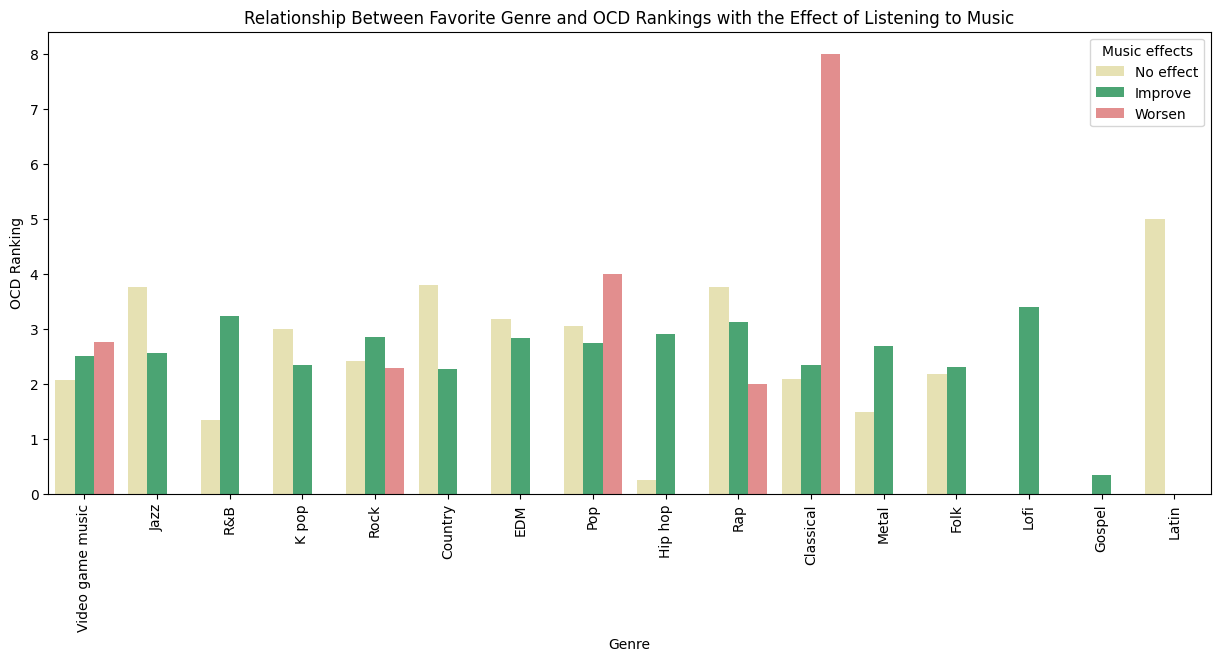

In [ ]:
#OCD
#source for help with 3 bars in seaborn (https://stackoverflow.com/questions/38807895/seaborn-multiple-barplots)
#set the colors based on the other effects graph
effects = ['palegoldenrod', 'mediumseagreen', 'lightcoral']

#plot
plt.figure(figsize=(15,6))
sns.barplot(data= mxmh, x='Fav genre', y='OCD', hue='Music effects', palette=effects, ci=None)
plt.xticks(rotation=90)

#add titles
plt.title("Relationship Between Favorite Genre and OCD Rankings with the Effect of Listening to Music")
plt.xlabel("Genre")
plt.ylabel("OCD Ranking")
ax.legend()

plt.show()

##**Now to look at the Spotify Revenue Dataset.**
This is mostly just to understand the current monetary performance of Spotify each quarter



###First, cleaning the data to include only what I need



In [ ]:
#removing columns I won't use (by choosing the only ones I do need)
spotify_qt = spotify_qt[["Date", "Total Revenue", "Cost of Revenue", "Gross Profit", "Sales and Marketing Cost", "Research and Development Cost"]]

#converting the date to datetime
spotify_qt['Date']= pd.to_datetime(spotify_qt['Date'], format='%d-%m-%Y')

#remove NaN entries
spotify_qt = spotify_qt.dropna()

<ipython-input-3-42ba4820cf8d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_qt['Date']= pd.to_datetime(spotify_qt['Date'], format='%d-%m-%Y')


###To begin, look at the first few rows, and all of the columns

In [ ]:
#first few rows of spotify_qt
spotify_qt.head()

In [ ]:
#all columns in spotify_qt
spotify_qt.info()

Important Note: all of the monetary figures are in millions of Euros

### First, examine the revenue and expenses on the same graph

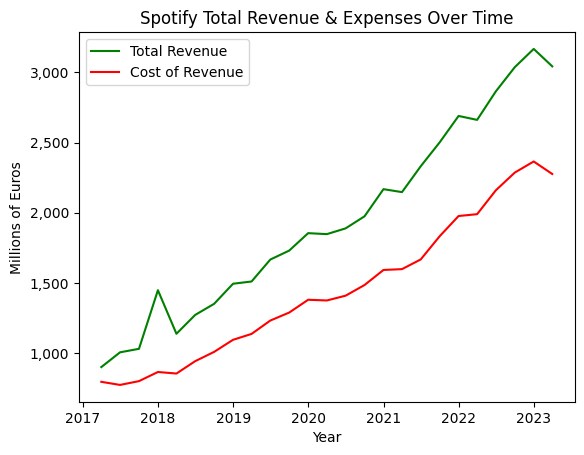

In [ ]:
#use a line graph for this

#plot lines
plt.plot('Date','Total Revenue', data= spotify_qt,color='green',label='Total Revenue')
plt.plot('Date','Cost of Revenue', data= spotify_qt,color='red',label='Cost of Revenue')

#add labels
plt.xlabel('Year')
plt.ylabel('Millions of Euros')
plt.title('Spotify Total Revenue & Expenses Over Time')
plt.legend()

#formatting y-axis labels with commas for thousands
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

### Looking at the revenue and profit

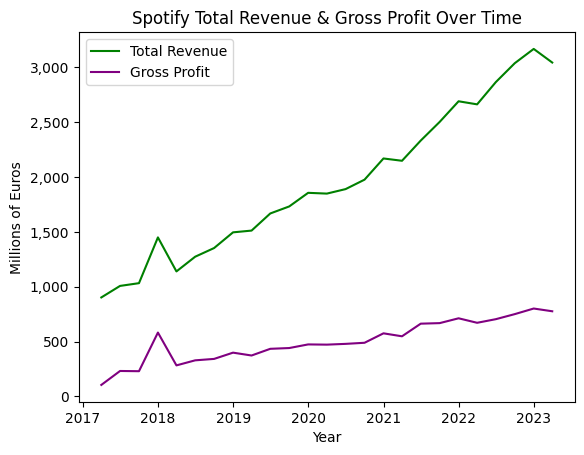

In [ ]:
#use a line graph for this

#plot lines
plt.plot('Date','Total Revenue', data= spotify_qt,color='green',label='Total Revenue')
plt.plot('Date','Gross Profit', data= spotify_qt,color='purple',label='Gross Profit')

#add labels
plt.xlabel('Year')
plt.ylabel('Millions of Euros')
plt.title('Spotify Total Revenue & Gross Profit Over Time')
plt.legend()

#formatting y-axis labels with commas for thousands
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

### Looking at cost of Sales&Marketing vs Research&Development

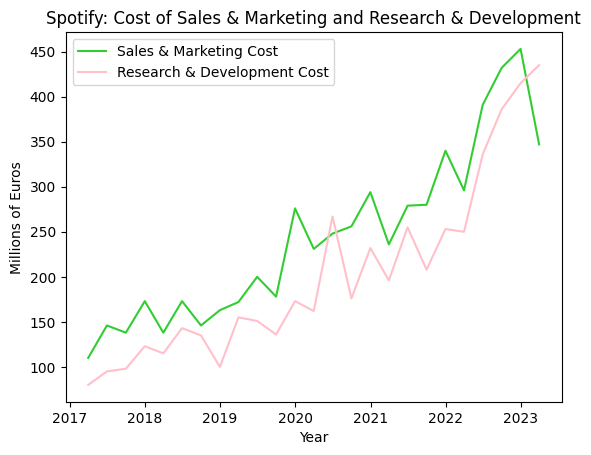

In [ ]:
#use a line graph for this

#plot lines
plt.plot('Date','Sales and Marketing Cost', data= spotify_qt,color='limegreen',label='Sales & Marketing Cost')
plt.plot('Date','Research and Development Cost', data= spotify_qt,color='pink',label='Research & Development Cost')

#add labels
plt.xlabel('Year')
plt.ylabel('Millions of Euros')
plt.title('Spotify: Cost of Sales & Marketing and Research & Development')
plt.legend()

#formatting y-axis labels with commas for thousands
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()